Task 2: Credit Risk Prediction

In [ ]:
#Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Load dataset:

df = pd.read_csv("Loan Prediction.csv")
df.columns = df.columns.str.strip()  # remove spaces
print(df.columns)  # now Loan_ID will show


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [ ]:
# Show basic structure:

print("Shape:", df.shape)
df.head(15)

Shape: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


1. Handling Missing Values:

In [ ]:
# Show missing values:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
# Fill categorical missing with mode, numeric with median:

for column in df.columns:
    if df[column].dtype == "object":
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

# Confirm no missing values:
print("Missing Values after fixing:\n\n", df.isnull().sum(),"\n")

Missing Values after fixing:

 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64 



C:\Users\PMLS\AppData\Local\Temp\ipykernel_10396\1536194342.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\PMLS\AppData\Local\Temp\ipykernel_10396\1536194342.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

2. Advanced Visualizations:

a) Applicant Income Distribution by Education

C:\Users\PMLS\AppData\Local\Temp\ipykernel_10396\3107695013.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education', y='ApplicantIncome', data=df, palette="muted")


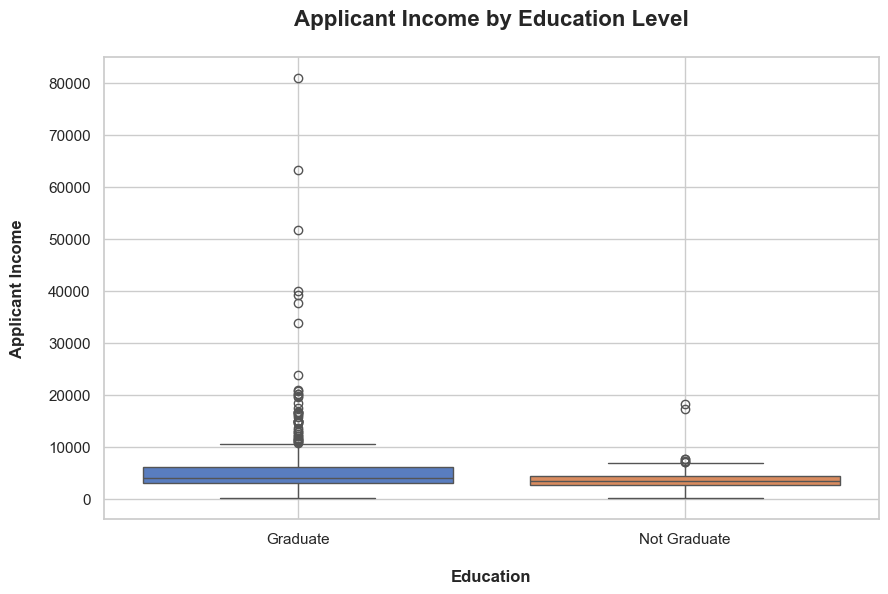

In [24]:
#Box Plot
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.boxplot(x='Education', y='ApplicantIncome', data=df, palette="muted")
plt.title('Applicant Income by Education Level\n', fontsize=16, fontweight='bold')
plt.ylabel("Applicant Income\n",fontsize=12, fontweight='bold')
plt.xlabel("\nEducation",fontsize=12, fontweight='bold')
plt.grid(True)
plt.show()

b) Loan Amount Distribution

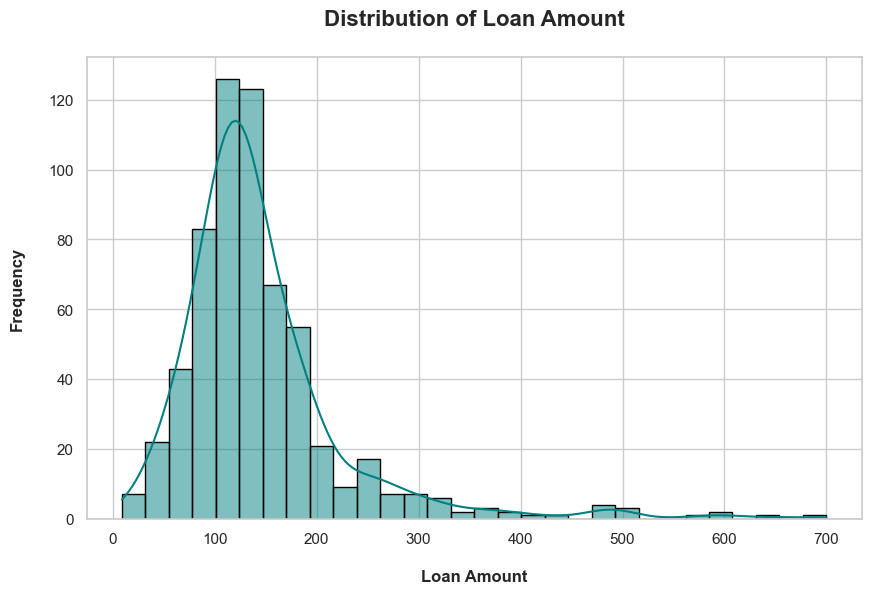

In [13]:
#Histogram
plt.figure(figsize=(10,6))
sns.histplot(df['LoanAmount'], bins=30, kde=True, color='teal', edgecolor='black')
plt.title('Distribution of Loan Amount\n', fontsize=16, fontweight='bold')
plt.xlabel("\nLoan Amount", fontsize=12, fontweight='bold')
plt.ylabel("Frequency\n", fontsize=12, fontweight='bold')
plt.grid(True)
plt.show()

c)  Loan Status by Education

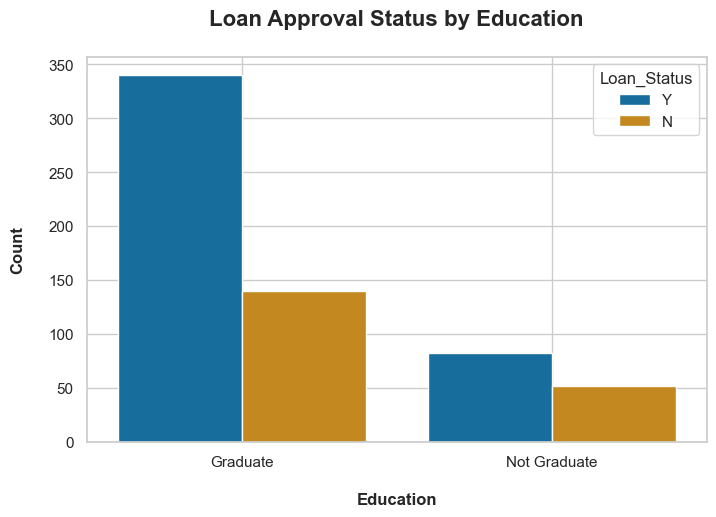

In [20]:
#Count Plot
plt.figure(figsize=(8,5))
sns.countplot(x="Education", hue="Loan_Status", data=df, palette="colorblind")
plt.title("Loan Approval Status by Education\n", fontsize=16, fontweight='bold')
plt.xlabel("\nEducation", fontsize=12, fontweight='bold')
plt.ylabel("Count\n", fontsize=12, fontweight='bold')
plt.grid(True)
plt.show()

3. Preprocessing for Model:

In [ ]:
# Step 1: Load data again to clean column names
df = pd.read_csv("Loan Prediction.csv")
df.columns = df.columns.str.strip()  # Remove spaces in headers as Loan_ID wasn't appearing

# Step 2: Confirm column names
print(df.columns.tolist())  # Make sure 'Loan_ID' appears correctly

# Step 3: Drop Loan_ID
df.drop('Loan_ID', axis=1, inplace=True)  # Now this won't give error

# Step 4: Encode categorical columns
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


4. Train-Test Split:

In [49]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Train Logistic Regression Model:

In [54]:
print(X_train.dtypes)

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode if not done correctly all objects to numeric already:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [ ]:
#Check for Missing Values:

print(X_train.isnull().sum())
print(y_train.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64
0


In [ ]:
#If any value > 0 → fix it:

X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [ ]:
#Confirm Shapes and Types:

print(X_train.shape)
print(y_train.shape)
print(type(X_train), type(y_train))

(491, 11)
(491,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [ ]:
#Now Train model with Logistic Regression:

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\PMLS\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 6. Evaluate Model:

In [103]:
# Accuracy:

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.7723577235772358


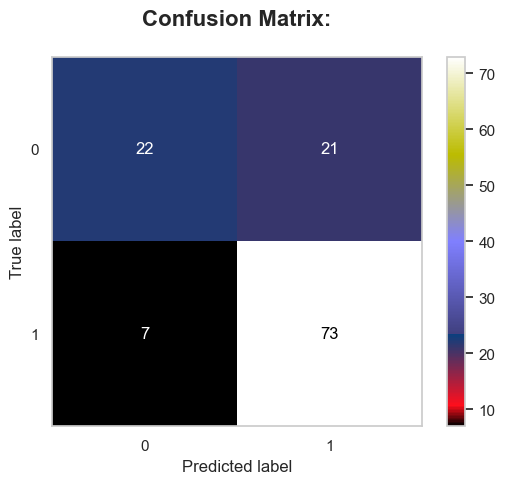

In [105]:
# Confusion Matrix:

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='gist_stern')
plt.title("Confusion Matrix:\n", fontsize='16', fontweight='bold')
plt.grid(False)
plt.show()